# Linear Regression

In [2]:
import mglearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x, y = mglearn.datasets.make_wave(n_samples = 60)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

lr = LinearRegression().fit(x_train, y_train)

print(f"train score: {lr.score(x_train, y_train): 0.2f}")
print(f"test score: {lr.score(x_test, y_test): 0.2f}")

train score:  0.66
test score:  0.69


In [4]:
# boston datasets
x, y = mglearn.datasets.load_extended_boston()

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
lr = LinearRegression().fit(x_train, y_train)

print(f"train score: {lr.score(x_train, y_train): 0.2f}")
print(f"test score: {lr.score(x_test, y_test): 0.2f}")

train score:  0.95
test score:  0.61


# Ridge

In [9]:
# rigid regression
from sklearn.linear_model import Ridge
ridge = Ridge().fit(x_train, y_train)
print(f"train Acc: {ridge.score(x_train, y_train): 0.2f}")
print(f"test Acc: {ridge.score(x_test, y_test): 0.2f}")

train Acc:  0.89
test Acc:  0.75


In [12]:
# alpha가 클수록 제약을 적게 주기 때문에 linear regreesion 결과와 동일해짐
ridge10 = Ridge(alpha = 10).fit(x_train, y_train)

print(f"train Acc: {ridge.score(x_train, y_train): 0.2f}")
print(f"test Acc: {ridge.score(x_test, y_test): 0.2f}")

train Acc:  0.93
test Acc:  0.77


In [13]:
# alpha가 클수록 제약을 적게 주기 때문에 linear regreesion 결과와 동일해짐
ridge01 = Ridge(alpha = 0.1).fit(x_train, y_train)

print(f"train Acc: {ridge.score(x_train, y_train): 0.2f}")
print(f"test Acc: {ridge.score(x_test, y_test): 0.2f}")

train Acc:  0.93
test Acc:  0.77


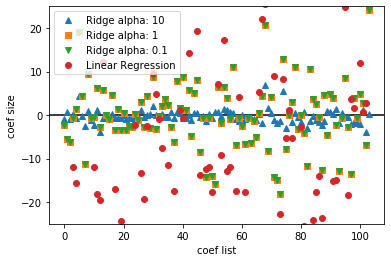

In [16]:
import matplotlib.pyplot as plt

plt.plot(ridge10.coef_, "^", label = "Ridge alpha: 10")
plt.plot(ridge.coef_, "s", label = "Ridge alpha: 1")
plt.plot(ridge01.coef_, "v", label = "Ridge alpha: 0.1")
plt.plot(lr.coef_, 'o', label = "Linear Regression")

plt.xlabel("coef list")
plt.ylabel("coef size")

xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

# Lasso

In [19]:
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso().fit(x_train, y_train)

print(f"train acc: {lasso.score(x_train, y_train): 0.2f}")
print(f"test acc: {lasso.score(x_test, y_test): 0.2f}")
print(f"number of features: {np.sum(lasso.coef_ != 0)}")

train acc:  0.29
test acc:  0.21
number of features: 4


In [21]:
lasso001 = Lasso(alpha = 0.01, max_iter = 100000).fit(x_train, y_train)

print(f"train acc: {lasso001.score(x_train, y_train): 0.2f}")
print(f"test acc: {lasso001.score(x_test, y_test): 0.2f}")
print(f"number of features: {np.sum(lasso001.coef_ != 0)}")

train acc:  0.90
test acc:  0.77
number of features: 33


In [22]:
# alpha 계수가 커질수록 Linear Regression 결과와 유사
lasso00001 = Lasso(alpha = 0.0001, max_iter = 100000).fit(x_train, y_train)

print(f"train acc: {lasso00001.score(x_train, y_train): 0.2f}")
print(f"test acc: {lasso00001.score(x_test, y_test): 0.2f}")
print(f"number of features: {np.sum(lasso00001.coef_ != 0)}")

train acc:  0.95
test acc:  0.64
number of features: 96


## Ridge and Lasso

- 일반적으로 Ridge를 선호하지만 변수가 많은 경우, Lasso를 통해서 변수를 줄이기도 함.
- 설명하기 쉬운 것은 Lasso
- ElasticNet은 이 두 가지를 동시에 고려하는 방식으로 최적 파라미터를 조정해야 함.
- L1 regularization: Lasso / L2 regularization: Ridge